# References
https://geodata.lib.berkeley.edu/catalog/stanford-gn214np6763 (for tanzania polygon)\
https://autogis-site.readthedocs.io/en/latest/notebooks/L1/geometric-objects.html (for handling shape files)

In [2]:
import pandas as pd
import json
import seaborn as sns
sns.set(rc={'figure.figsize':(11,8)})
import numpy as np
from shapely.geometry import Point, shape, LineString
import folium
import matplotlib.pyplot as plt


Tanzania_coord = (-6.3690,34.8888)

pd.set_option('display.max_columns', None)
# pd.reset_option(“max_columns”)

In [3]:
X_train_raw = pd.read_csv('data/Training_set.csv')
y_train_raw = pd.read_csv('data/Training_labels.csv')

X_test_raw = pd.read_csv('data/Test_set.csv')

df = pd.merge(X_train_raw,y_train_raw,on='id')

<AxesSubplot:>

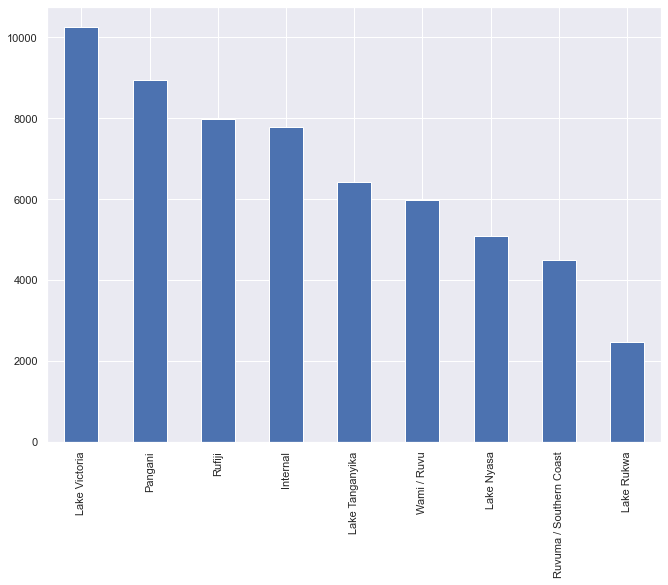

In [6]:
df.basin.value_counts().plot(kind='bar')

<AxesSubplot:>

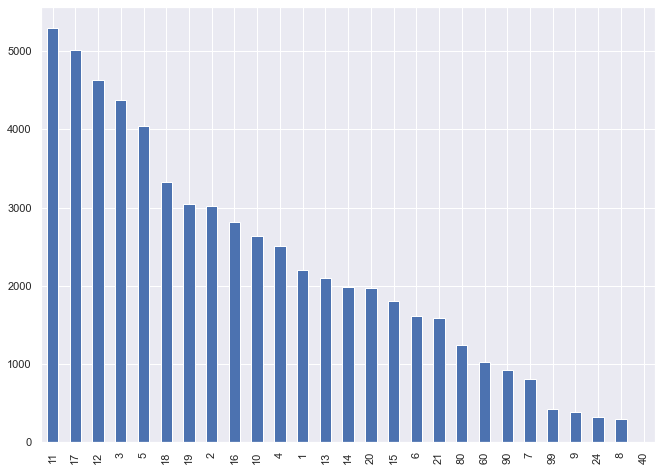

In [16]:
df.region_code.value_counts().plot(kind = 'bar')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

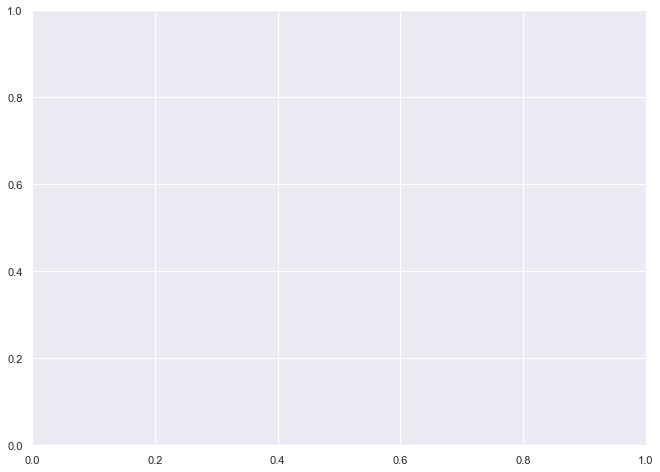

In [12]:
plt.bar(df.region_code.values,df.region_code.value_counts().values);

In [47]:
X_test_raw[abs(X_test_raw.longitude)==0].latitude.value_counts()

-2.000000e-08    457
Name: latitude, dtype: int64

In [3]:
df.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional


In [102]:
X_test_raw[X_test_raw.longitude==0]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
28,44718,0.0,2013-02-04,Dwsp,0,DWE,0.0,-2.000000e-08,Nkubanija,0,Lake Victoria,Nkonze,Shinyanga,17,1,Bariadi,Lugulu,0,True,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,pay when scheme fails,on failure,salty abandoned,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
55,15962,0.0,2011-08-01,Hesawa,0,Hesawa,0.0,-2.000000e-08,Bombani,0,Lake Victoria,Nyang'Hulukulu,Mwanza,19,6,Geita,Nyang'hwale,0,True,GeoData Consultants Ltd,VWC,Borehole,True,0,other,other,other,vwc,user-group,unknown,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,other,other
68,45374,0.0,2013-02-16,Dwsp,0,DWE,0.0,-2.000000e-08,Maendeleo,0,Lake Victoria,Magua,Mwanza,17,1,Magu,Nkungulu,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
139,68616,0.0,2011-07-19,Plan International,0,Plan Internationa,0.0,-2.000000e-08,Mwatulole,0,Lake Victoria,Ihayabuyaga,Mwanza,19,6,Geita,Kalangalala,0,True,GeoData Consultants Ltd,VWC,Borehole,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,hand pump,hand pump
150,51539,0.0,2013-02-09,Dwsp,0,DWE,0.0,-2.000000e-08,Mwashidakwa,0,Lake Victoria,Magongolo,Shinyanga,17,1,Bariadi,Gamboshi,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14649,30454,0.0,2011-08-08,Nyamigogo,0,MASWI,0.0,-2.000000e-08,Husein,0,Lake Victoria,Nyaweshi,Mwanza,19,6,Geita,Kharumwa,0,True,GeoData Consultants Ltd,VWC,Borehole,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14676,44766,0.0,2013-02-16,Dwsp,0,DWE,0.0,-2.000000e-08,Imalanota,0,Lake Victoria,Busumabwi,Mwanza,17,1,Magu,Nkungulu,0,False,GeoData Consultants Ltd,WUG,NaN,False,0,swn 80,swn 80,handpump,wug,user-group,other,other,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
14766,56279,0.0,2012-11-04,Government Of Tanzania,0,RWE,0.0,-2.000000e-08,Ofisini,0,Lake Victoria,Madukani,Mwanza,19,2,Magu,Mkula,0,True,GeoData Consultants Ltd,VWC,Kalemela Water Supply,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,lake,river/lake,surface,communal standpipe multiple,communal standpipe
14831,37994,0.0,2012-10-26,Hesawa,0,DWE,0.0,-2.000000e-08,Kwa Masilili,0,Lake Victoria,Solima A,Mwanza,19,2,Magu,Kabita,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [92]:
region_from_df = list(set(df.region.str.lower().to_list()))
region_from_df

['dar es salaam',
 'iringa',
 'shinyanga',
 'kilimanjaro',
 'manyara',
 'mbeya',
 'dodoma',
 'mara',
 'ruvuma',
 'tabora',
 'singida',
 'mwanza',
 'lindi',
 'tanga',
 'rukwa',
 'morogoro',
 'kigoma',
 'kagera',
 'mtwara',
 'arusha',
 'pwani']

In [93]:
for each in region_from_df:
    if each not in adm1_list:
        print(each)

# MAP STUFF. IGNORE FOR NOW

In [7]:
with open('data/stanford-tn398yw9512-geojson_districtBoundary.json', 'r',encoding='utf8') as f:
    geoJSON_raw = json.load(f)

In [96]:
adm1_list_gjson = list(set([each['properties']['adm1'].replace('-', ' ').lower() for each in geoJSON_raw['features']]))
# adm2_list_gjson = list(set([each['properties']['adm2'].replace('-', ' ').lower() for each in geoJSON_raw['features']]))

In [5]:
map_shape = shape(geoJSON_raw['features'][0]['geometry'])

In [ ]:
m=folium.Map(location=Tanzania_coord, zoom_start=5, tiles='CartoDB positron')
geo_j = folium.GeoJson(data=geoJSON_raw,
                           style_function=lambda x: {'fillColor': 'orange'})
geo_j.add_to(m)

for each in df_high_head.iterrows():
    folium.Marker(
#         location=[each[1]['latitude'], each[1]['longitude']],
        location=(each[1]['latitude'],each[1]['longitude']),
        icon=folium.Icon(color="blue",icon="tint", prefix='fa')
    ).add_to(m)

m

# LAT and LONG

Some are marked as (lat,long) = (-2*e-8, 0) ~ (0,0) . In other words, location is missing.

1812 records ~ 3.050505 %

In [ ]:
X_train.loc[(abs(X_train.longitude) <0.05) & (abs(X_train.latitude) <0.05)].region.unique()

In [ ]:
X_train[X_train.region=='Shinyanga']

In [ ]:
df_high_head = X_train[X_train.amount_tsh>10000]

In [ ]:
# X_train['lon_lat'] = tuple(zip(X_train['longitude'], X_train['latitude']))
# X_train['inside_Tanzania_border'] = X_train['lon_lat'].map(lambda x : tanzania_shape.contains(Point(x)))

In [ ]:
# X_train_notInTanzania_minus00 = X_train.loc[
#     (X_train.inside_Tanzania_border == False) &
#     (abs(X_train.longitude) > 0.05) &
#     (abs(X_train.latitude) > 0.05)
#            ]
# X_train_notInTanzania_minus00

In [ ]:
# X_train.to_csv('data/X_train.csv')

# amount_tsh
total static head has no negative values. 
0 = outlet same level as inlet (assuming no inlet and outlet pressures other than head)
-ve = outlet lower than inlet. why pump? maybe hand pumps? (assuming no inlet and outlet pressures other than head)
+ve = outlet higher than inlet. (assuming no inlet and outlet pressures other than head)

In [ ]:
X_train[X_train.amount_tsh>10000].index

In [ ]:
y_train.iloc[X_train[X_train.amount_tsh>1].index,:].status_group.value_counts(normalize=True)

# NULLS

In [ ]:
# Columns with nulls
X_train.isna().sum()

In [ ]:
X_train.shape[0]

In [ ]:
X_train.village.isna().sum()

In [ ]:
X_train.subvillage.isna().sum()

In [ ]:
X_train.describe()

In [ ]:
df = pd.merge(X_train,y_train,on='id')

In [ ]:
df.select_dtypes(np.number)

In [ ]:
df = pd.DataFrame.copy(X_train)
df.drop(columns = ['id','longitude','latitude','gps_height'])
df

In [ ]:
df['water_quality | quality_grup']= df.water_quality + df.quality_group

In [ ]:
df['water_quality'].value_counts()

In [ ]:
df['quality_group'].value_counts()

In [ ]:
df['water_quality | quality_grup'].value_counts()

In [ ]:
df['wpt_type_to_wpt_type_grp'] = df.waterpoint_type +  df.waterpoint_type_group

In [ ]:
df.waterpoint_type.value_counts()

In [ ]:
df.waterpoint_type_group.value_counts()

In [ ]:
df.funder.value_counts()

In [ ]:
df.installer.value_counts()

In [ ]:
sns.heatmap(df.corr(),annot= True)

In [ ]:
df.gps_height.sort_values()

In [ ]:
df_highest = df[df.gps_height>2500].sort_values(by='gps_height')

In [ ]:
df_highest.status_group

In [ ]:
import folium

m = folium.Map(location = (-2.000000e-08,0), tiles = "Stamen Watercolor", zoom_start = 10)
number_of_markers = 100
i=0
for each in df_highest.iterrows():    
    folium.Marker(
        location=[each[1]['latitude'], each[1]['longitude']],
        icon=folium.Icon(color="green",icon="money", prefix='fa')
    ).add_to(m)
        
m

# New heading